In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import pearsonr,spearmanr

In [ ]:
!gdown 1nKb67meAvoFNRG_VueNXh_-k_2F9Oisc
!gdown 144wrGLTgzCm8FZdl0rasbjsm6dKG_yvB
!gdown 1xgzPmbSCU8KM6Lt1rJXLFADHxgsy9u4t
!gdown 1F8EPu3t_GbXX3BQ3OQSXsoieeSsCR5ly
!gdown 1CmZ0j83nKoNeOqbGgZHSa92-kdXHkXIP

Downloading...
From: https://drive.google.com/uc?id=1nKb67meAvoFNRG_VueNXh_-k_2F9Oisc
To: /content/Customers.csv
100% 31.8k/31.8k [00:00<00:00, 48.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=144wrGLTgzCm8FZdl0rasbjsm6dKG_yvB
To: /content/Discount_Coupon.csv
100% 4.92k/4.92k [00:00<00:00, 10.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xgzPmbSCU8KM6Lt1rJXLFADHxgsy9u4t
To: /content/Marketing_Spend.csv
100% 8.67k/8.67k [00:00<00:00, 24.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1F8EPu3t_GbXX3BQ3OQSXsoieeSsCR5ly
To: /content/Online_Sales.csv
100% 5.24M/5.24M [00:00<00:00, 28.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CmZ0j83nKoNeOqbGgZHSa92-kdXHkXIP
To: /content/Tax_amount.csv
100% 297/297 [00:00<00:00, 1.00MB/s]


In [ ]:
cust_data = pd.read_csv("Customers.csv")
discount_coup = pd.read_csv("Discount_Coupon.csv")
mrkt_spend = pd.read_csv("Marketing_Spend.csv")
online_sale = pd.read_csv("Online_Sales.csv")
tax_amt = pd.read_csv("Tax_amount.csv")

In [ ]:
#converting customer id to string
cust_data['CustomerID']=cust_data['CustomerID'].astype(str)

In [ ]:
discount_coup['Discount_pct']=discount_coup['Discount_pct']/100

In [ ]:
mrkt_spend.Date = pd.to_datetime(mrkt_spend["Date"])

In [ ]:
online_sale['CustomerID']=online_sale['CustomerID'].astype(str)
online_sale['Transaction_ID']=online_sale['Transaction_ID'].astype(str)
online_sale['Transaction_Date'] = pd.to_datetime(online_sale['Transaction_Date'], format='%m/%d/%Y')
online_sale['Month'] = online_sale['Transaction_Date'].dt.strftime('%b')

In [ ]:
merged_df = pd.merge(online_sale, discount_coup, on=['Month', 'Product_Category'], how='left')


In [ ]:
merged_df['Coupon_Code'].fillna('Not Available',inplace=True)

merged_df['Discount_pct'].fillna(0, inplace=True)

<ipython-input-24-96f035ce8d48>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Coupon_Code'].fillna('Not Available',inplace=True)
<ipython-input-24-96f035ce8d48>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  object        
 1   Transaction_ID       52924 non-null  object        
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Coupon_Code          52924 non-null  object        
 12  Discount_pct         52924 non-null  float64       
dtypes: datetime64[ns](1), float64(3

## Coupon use and high transaction value

H0: The average transaction value for customers who use coupons is less than or equal to the average transaction value for customers who don't use coupons.

H₁: The average transaction value for customers who use coupons is greater than the average transaction value for customers who don't use coupons.

In [ ]:
merged_df['Coupon_Status'].value_counts()

,count
Coupon_Status,
Clicked,26926
Used,17904
Not Used,8094


In [ ]:
merged_df['Transaction_Value'] = merged_df['Quantity'] * merged_df['Avg_Price']

# Define groups: customers who used coupons and those who didn't
used_coupons = merged_df[merged_df['Coupon_Status'] == 'Used']
not_used_coupons = merged_df[merged_df['Coupon_Status'] == 'Not Used']

In [ ]:
avg_used_coupons = used_coupons['Transaction_Value'].mean()
avg_not_used_coupons = not_used_coupons['Transaction_Value'].mean()

print("Average Transaction Value for Customers Who Used Coupons: ", avg_used_coupons)
print("Average Transaction Value for Customers Who Didn't Use Coupons: ", avg_not_used_coupons)


Average Transaction Value for Customers Who Used Coupons:  87.17706099195709
Average Transaction Value for Customers Who Didn't Use Coupons:  90.52506424511984


In [ ]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(used_coupons['Transaction_Value'], not_used_coupons['Transaction_Value'])

print("T-Statistic: ", t_stat)
print("P-Value: ", p_val)


T-Statistic:  -1.446695550665131
P-Value:  0.1479942682805814


In [ ]:
if p_val < 0.05:
    print("Reject the null hypothesis. Customers who use coupons have a significantly higher average transaction value.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average transaction value between customers who use coupons and those who don't.")

Fail to reject the null hypothesis. There is no significant difference in average transaction value between customers who use coupons and those who don't.


## Influence of Demographics on Purchase Behavior


H₀: There is no difference in average purchase frequency (or order value) across different demographic groups (e.g., gender, location).

H₁: There is a difference in average purchase frequency (or order value) across different demographic groups.

lets check for gender fiorst then well do for location

In [ ]:

# Preprocess dates
online_sale['Transaction_Date'] = pd.to_datetime(online_sale['Transaction_Date'])

# Merge the customer demographic data with the sales data
merged_data = pd.merge(online_sale, cust_data, on="CustomerID", how="inner")

# Calculate average order value (revenue per transaction)
merged_data['Order_Value'] = merged_data['Quantity'] * merged_data['Avg_Price']


In [ ]:
# Group data by gender and calculate purchase frequency (number of orders)
purchase_frequency_gender = (
    merged_data.groupby('Gender')['Transaction_ID'].nunique()
).reset_index(name='Purchase_Frequency')

In [ ]:
from scipy.stats import f_oneway

# Perform one-way ANOVA for purchase frequency across genders
grouped_data_gender = [merged_data[merged_data['Gender'] == gender]['Transaction_ID'].nunique()
                       for gender in merged_data['Gender'].unique()]
f_stat_gender, p_value_gender = f_oneway(*grouped_data_gender)

# Print results for Gender
print("ANOVA Results for Gender (Purchase Frequency):")
print("F-statistic:", f_stat_gender)
print("P-value:", p_value_gender)

ANOVA Results for Gender (Purchase Frequency):
F-statistic: nan
P-value: nan


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if _f_oneway_is_too_small(samples):


In [ ]:

if p_value_gender < 0.05:
    print("Reject H₀: There is a difference in average purchase frequency across genders.")
else:
    print("Fail to reject H₀: No significant difference in purchase frequency across genders.")


Fail to reject H₀: No significant difference in purchase frequency across genders.


lets check for location as well

In [ ]:
# Group data by location and calculate average order value
order_value_location = (
    merged_data.groupby('Location')['Order_Value'].mean()
).reset_index(name='Average_Order_Value')


In [ ]:
# Perform one-way ANOVA for order value across locations
grouped_data_location = [merged_data[merged_data['Location'] == loc]['Order_Value']
                         for loc in merged_data['Location'].unique()]
f_stat_location, p_value_location = f_oneway(*grouped_data_location)

# Print results for Location
print("\nANOVA Results for Location (Order Value):")
print("F-statistic:", f_stat_location)
print("P-value:", p_value_location)


ANOVA Results for Location (Order Value):
F-statistic: 3.244958289234009
P-value: 0.011381390904715634


In [ ]:

if p_value_location < 0.05:
    print("Reject H₀: There is a difference in average order value across locations.")
else:
    print("Fail to reject H₀: No significant difference in order value across locations.")

Reject H₀: There is a difference in average order value across locations.


In [ ]:
order_value_location

,Location,Average_Order_Value
0,California,89.393115
1,Chicago,88.459498
2,New Jersey,90.976429
3,New York,83.864909
4,Washington DC,93.620878


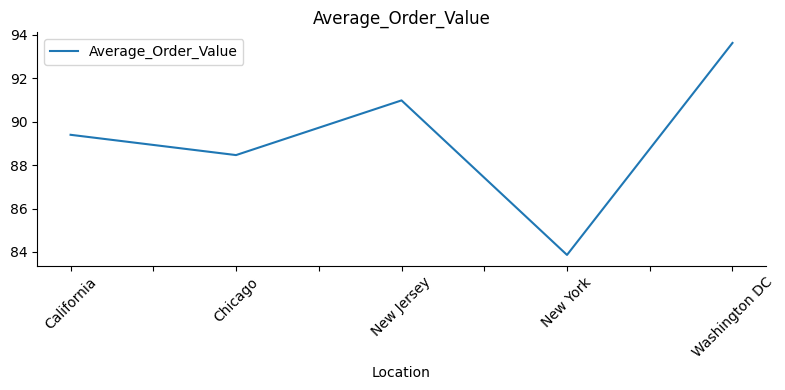

In [ ]:
order_value_location.plot(x='Location', y='Average_Order_Value', kind='line', figsize=(8, 4), title='Average_Order_Value')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Tenure Segment vs. Purchase Frequency

H₀: Customers with low tenure (e.g., < 6 months) have no difference in purchase frequency compared to customers with high tenure (e.g.,
≥
6
≥6 months).

H₁: There is a difference in purchase frequency between low-tenure and high-tenure customers.

In [ ]:
# Merge the data to have customer tenure and their respective purchases
cust_sales = online_sale.merge(cust_data[['CustomerID', 'Tenure_Months']], on='CustomerID', how='left')


In [ ]:

# Create two groups based on tenure (low < 6 months and high >= 6 months)
low_tenure = cust_sales[cust_sales['Tenure_Months'] < 6]
high_tenure = cust_sales[cust_sales['Tenure_Months'] >= 6]

# Calculate purchase frequency (number of transactions) for each customer
low_tenure_freq = low_tenure.groupby('CustomerID').size()
high_tenure_freq = high_tenure.groupby('CustomerID').size()


In [ ]:
import scipy.stats as stats

# Perform an independent two-sample t-test to compare purchase frequencies
t_stat, p_value = stats.ttest_ind(low_tenure_freq, high_tenure_freq)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -0.6552548874825406
P-value: 0.5124064648060558


In [ ]:

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: There is a significant difference in purchase frequency between low-tenure and high-tenure customers.")
else:
    print("Fail to reject H₀: There is no significant difference in purchase frequency between low-tenure and high-tenure customers.")

Fail to reject H₀: There is no significant difference in purchase frequency between low-tenure and high-tenure customers.


<ipython-input-44-f8f3a0a28d66>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=purchase_freq, x='Tenure Group', y='Purchase Frequency', palette="Set2")


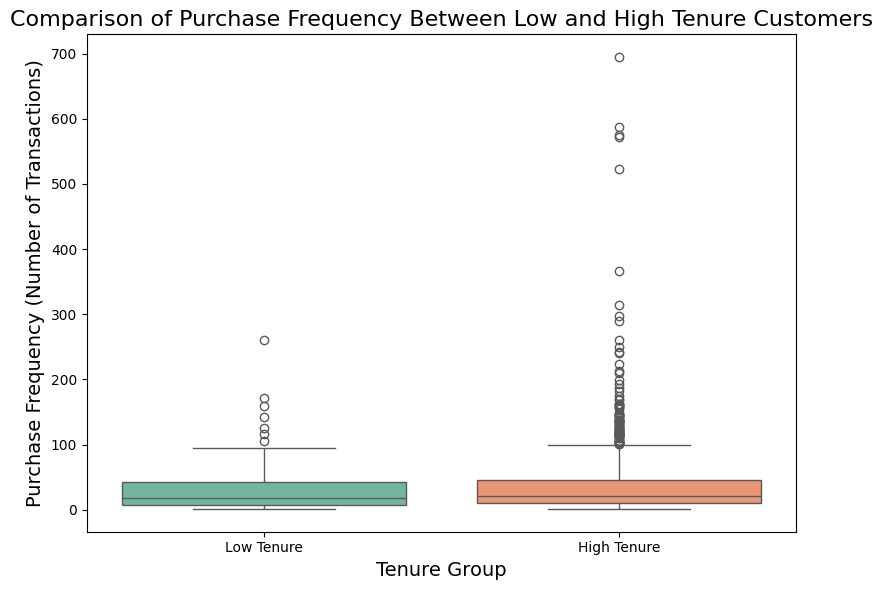

In [ ]:
purchase_freq = pd.DataFrame({
    'Tenure Group': ['Low Tenure'] * len(low_tenure_freq) + ['High Tenure'] * len(high_tenure_freq),
    'Purchase Frequency': list(low_tenure_freq) + list(high_tenure_freq)
})

#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=purchase_freq, x='Tenure Group', y='Purchase Frequency', palette="Set2")
plt.title('Comparison of Purchase Frequency Between Low and High Tenure Customers', fontsize=16)
plt.xlabel('Tenure Group', fontsize=14)
plt.ylabel('Purchase Frequency (Number of Transactions)', fontsize=14)
plt.tight_layout()
plt.show()

we we can clearly see that definetly there are a lot more instances of higher purchase frequency for high tenure

lets try to normalise to get a correct view of count

Purchase Frequency=
Tenure (in months)/
Total Transactions
​



In [ ]:
# Calculate the total number of transactions for each customer
customer_transactions = cust_sales.groupby('CustomerID').size().reset_index(name='Total_Transactions')

# Merge the transactions count back with customer tenure
customer_transactions = customer_transactions.merge(cust_data[['CustomerID', 'Tenure_Months']], on='CustomerID', how='left')

# Normalize purchase frequency (transactions per month)
customer_transactions['Purchase_Frequency'] = customer_transactions['Total_Transactions'] / customer_transactions['Tenure_Months']


In [ ]:
customer_transactions['Purchase_Frequency'].describe()

,Purchase_Frequency
count,1468.000000
mean,2.385220
std,4.659608
min,0.020000
25%,0.377778
50%,0.970833
75%,2.407502
max,63.000000


In [ ]:
# Split customers into low-tenure (<6 months) and high-tenure (>=6 months) groups
low_tenure_freq = customer_transactions[customer_transactions['Tenure_Months'] < 6]['Purchase_Frequency']
high_tenure_freq = customer_transactions[customer_transactions['Tenure_Months'] >= 6]['Purchase_Frequency']

t_stat, p_value = stats.ttest_ind(low_tenure_freq, high_tenure_freq, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 7.43025929586989
P-value: 1.910418967664428e-11


In [ ]:
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in normalized purchase frequency between low-tenure and high-tenure customers.")
else:
    print("Fail to reject H₀: There is no significant difference in normalized purchase frequency between low-tenure and high-tenure customers.")

Reject H₀: There is a significant difference in normalized purchase frequency between low-tenure and high-tenure customers.


<ipython-input-49-ff8222261e17>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=normalized_freq, x='Tenure Group', y='Normalized Purchase Frequency', palette="Set2")


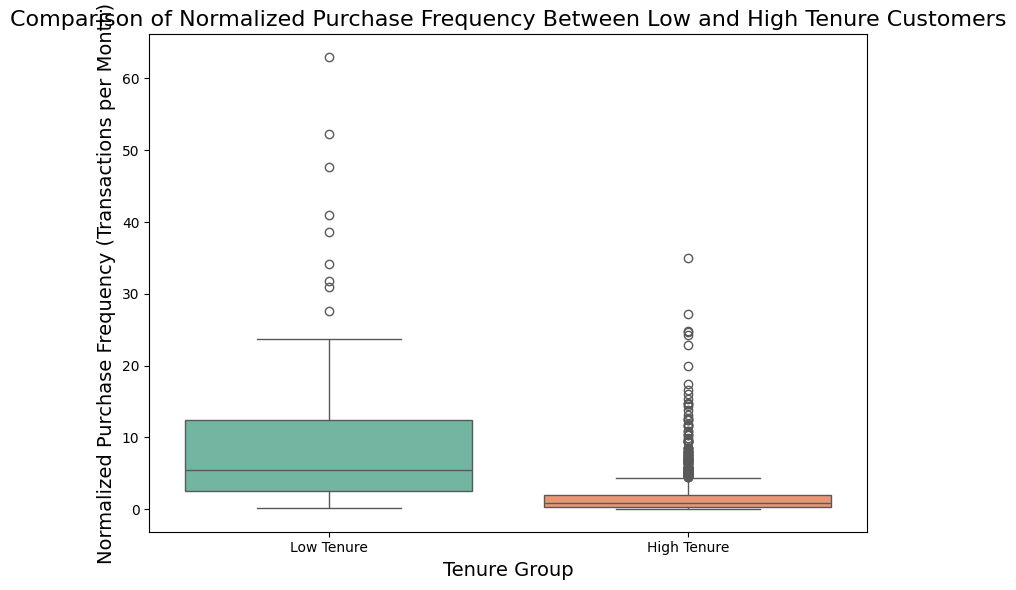

In [ ]:
normalized_freq = pd.DataFrame({
    'Tenure Group': ['Low Tenure'] * len(low_tenure_freq) + ['High Tenure'] * len(high_tenure_freq),
    'Normalized Purchase Frequency': list(low_tenure_freq) + list(high_tenure_freq)
})

plt.figure(figsize=(8, 6))
sns.boxplot(data=normalized_freq, x='Tenure Group', y='Normalized Purchase Frequency', palette="Set2")
plt.title('Comparison of Normalized Purchase Frequency Between Low and High Tenure Customers', fontsize=16)
plt.xlabel('Tenure Group', fontsize=14)
plt.ylabel('Normalized Purchase Frequency (Transactions per Month)', fontsize=14)
plt.tight_layout()
plt.show()

## Effect of Delivery Charges on Purchase Volume

H₀: Paying higher delivery charges does not affect the quantity ordered (i.e., no difference in quantity between orders with high vs. low delivery charges).

H₁: Higher delivery charges do affect quantity ordered (people might buy more in one go to offset shipping, or might buy less).

In [ ]:
online_sale[['Delivery_Charges','Quantity']].describe()

,Delivery_Charges,Quantity
count,52924.000000,52924.000000
mean,10.517630,4.497638
std,19.475613,20.104711
min,0.000000,1.000000
25%,6.000000,1.000000
50%,6.000000,1.000000
75%,6.500000,2.000000
max,521.360000,900.000000


In [ ]:
# Define a threshold for "low" and "high" delivery charges via median
delivery_charge_median = online_sale['Delivery_Charges'].median()

# Create two groups based on delivery charges
low_delivery = online_sale[online_sale['Delivery_Charges'] <= delivery_charge_median]['Quantity']
high_delivery = online_sale[online_sale['Delivery_Charges'] > delivery_charge_median]['Quantity']


In [ ]:
# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(low_delivery, high_delivery, equal_var=False)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -17.70515091569968
P-value: 6.769021741170138e-70


In [ ]:
if p_value < 0.05:
    print("Reject H₀: Higher delivery charges do affect the quantity ordered.")
else:
    print("Fail to reject H₀: Higher delivery charges do not affect the quantity ordered.")


Reject H₀: Higher delivery charges do affect the quantity ordered.


let us also check if that reflects in the overall bill amount as well

In [ ]:
online_sale['Bill_Amount'] = (online_sale['Quantity'] * online_sale['Avg_Price']) + online_sale['Delivery_Charges']

# Divide delivery charges into 3 groups: Low, Medium, High
online_sale['Delivery_Group'] = pd.qcut(
    online_sale['Delivery_Charges'],
    q=3,
    labels=["Low Delivery Charges", "Medium Delivery Charges", "High Delivery Charges"]
)

https://www.statology.org/pandas-qcut/

In [ ]:
low_group = online_sale[online_sale['Delivery_Group'] == "Low Delivery Charges"]['Bill_Amount']
medium_group = online_sale[online_sale['Delivery_Group'] == "Medium Delivery Charges"]['Bill_Amount']
high_group = online_sale[online_sale['Delivery_Group'] == "High Delivery Charges"]['Bill_Amount']


In [ ]:
f_stat, p_value = stats.f_oneway(low_group, medium_group, high_group)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 256.07811634486166
P-value: 2.09598152954417e-111


In [ ]:
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in bill amounts across delivery charge groups.")
else:
    print("Fail to reject H₀: There is no significant difference in bill amounts across delivery charge groups.")


Reject H₀: There is a significant difference in bill amounts across delivery charge groups.


<ipython-input-63-fa9b6c7f149f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=online_sale, x='Delivery_Group', y='Bill_Amount', palette="Set3")


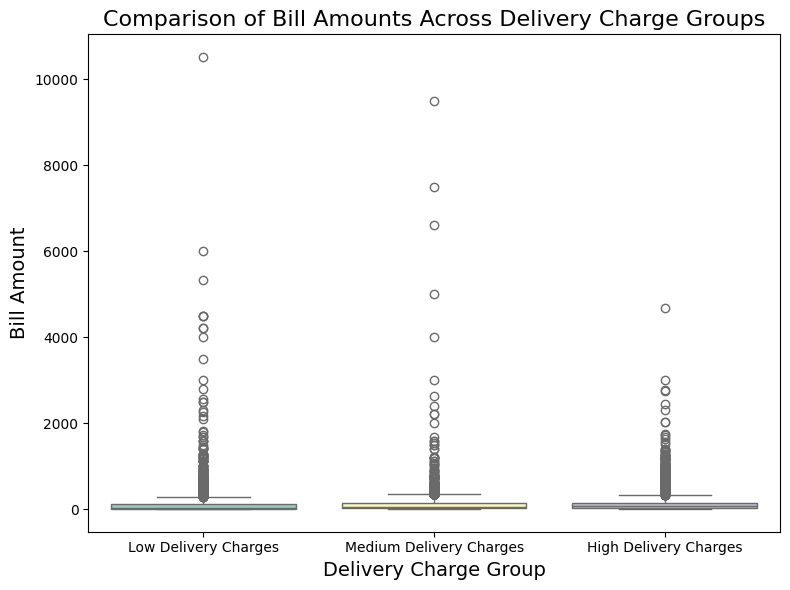

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=online_sale, x='Delivery_Group', y='Bill_Amount', palette="Set3")
plt.title('Comparison of Bill Amounts Across Delivery Charge Groups', fontsize=16)
plt.xlabel('Delivery Charge Group', fontsize=14)
plt.ylabel('Bill Amount', fontsize=14)
plt.tight_layout()
plt.show()

improve visibility

<ipython-input-64-d7b7cf8ef185>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=online_sale, x='Delivery_Group', y='Bill_Amount', palette="Set3")


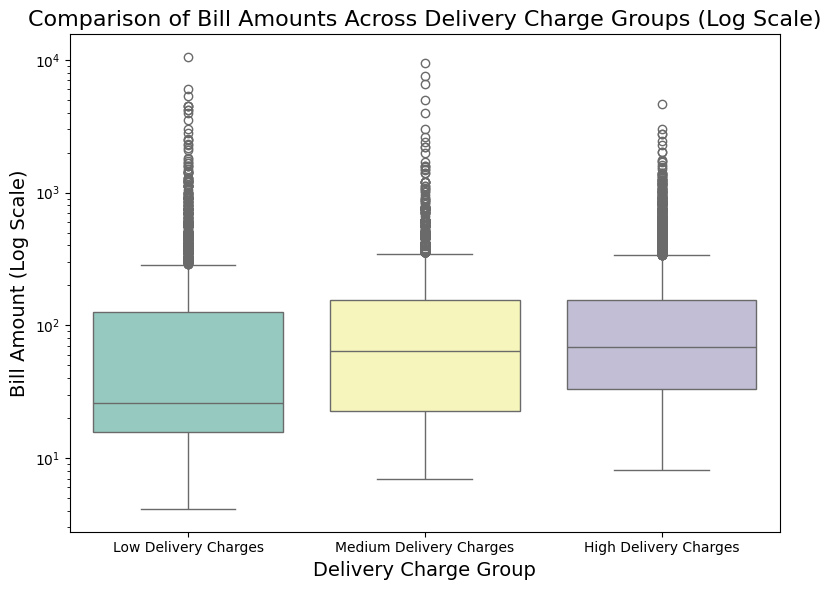

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=online_sale, x='Delivery_Group', y='Bill_Amount', palette="Set3")
plt.yscale('log')  # Apply logarithmic scale
plt.title('Comparison of Bill Amounts Across Delivery Charge Groups (Log Scale)', fontsize=16)
plt.xlabel('Delivery Charge Group', fontsize=14)
plt.ylabel('Bill Amount (Log Scale)', fontsize=14)
plt.tight_layout()
plt.show()

or remove outliers.

you'll learn more about this latter

<ipython-input-66-c9f98fd9db9a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Delivery_Group', y='Bill_Amount', palette="Set3")


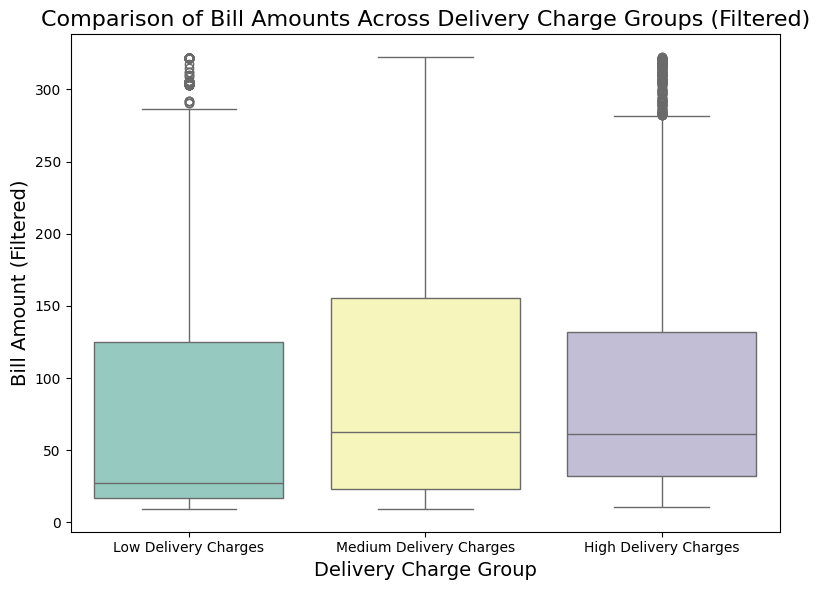

In [ ]:
# Calculate the 5th and 95th percentiles
lower_bound = online_sale['Bill_Amount'].quantile(0.05)
upper_bound = online_sale['Bill_Amount'].quantile(0.95)

# Filter data to remove outliers
filtered_data = online_sale[(online_sale['Bill_Amount'] >= lower_bound) & (online_sale['Bill_Amount'] <= upper_bound)]

# Re-plot the boxplot with filtered data
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data, x='Delivery_Group', y='Bill_Amount', palette="Set3")
plt.title('Comparison of Bill Amounts Across Delivery Charge Groups (Filtered)', fontsize=16)
plt.xlabel('Delivery Charge Group', fontsize=14)
plt.ylabel('Bill Amount (Filtered)', fontsize=14)
plt.tight_layout()
plt.show()